# Text Mining & Image Recognition; Hoja de Trabajo 1 
### Diego Fernando Bran Arriola 
### Sección V

# Poblema 1

Desarrolle una función la cual reciba dos parámetros, una imagen y un entero llamado color, la función debe devolver una imagen la cual tenga activos los canales de color según los siguientes puntos:
- Si el parámetro color vale 1, la imagen debe mostrar activos únicamente el color azul.
- Si el parámetro color vale 2, la imagen debe mostrar activos únicamente el color verde.
- Si el parámetro color vale 3, la imagen debe mostrar activos únicamente el color rojo.
- Si el parámetro color vale 10, la imagen debe mostrar activos únicamente los colores rojo y verde.
- Si el parámetro color vale 20, la imagen debe mostrar activos únicamente los colores verde y azul.
- Si el parámetro color vale 30, la imagen debe mostrar activos únicamente los colores azul y rojo.

In [2]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

In [9]:
def color_mapper(img, color):
    alto = img.shape[0]
    ancho = img.shape[1]
    img_salida = np.zeros_like(img)

    # Procesar la imagen según el parámetro color
    for i in range(alto):
        for j in range(ancho):
            pixel = img[i, j]

            blue = pixel[2]
            green = pixel[1]
            red = pixel[0]

            if color == 1:
                img_salida[i, j] = [0, 0, blue]
            elif color == 2:
                img_salida[i, j] = [0, green, 0]
            elif color == 3:
                img_salida[i, j] = [red, 0, 0]
            elif color == 10:
                img_salida[i, j] = [red, green, 0]
            elif color == 20:
                img_salida[i, j] = [0, green, blue]
            elif color == 30:
                img_salida[i, j] = [red, 0, blue]
            else:
                img_salida[i, j] = [red, green, blue] 

    return img_salida


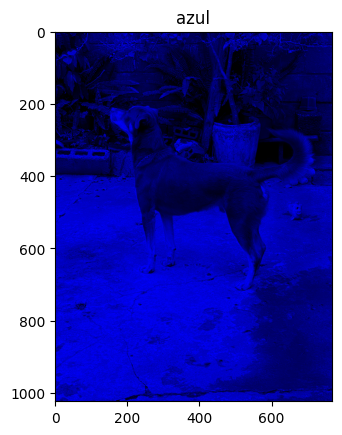

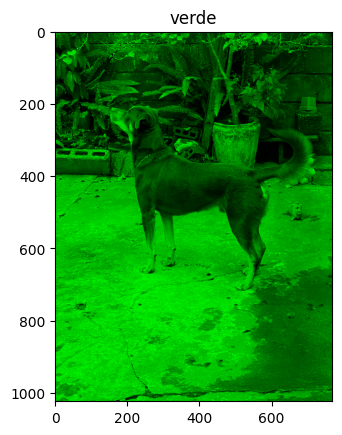

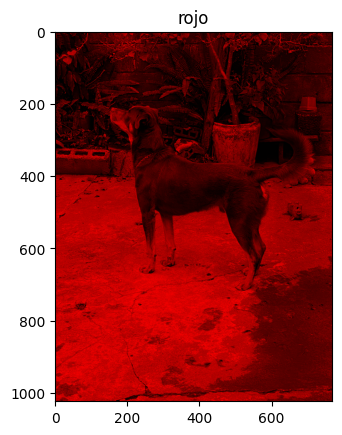

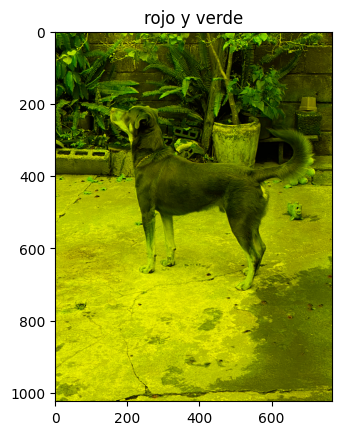

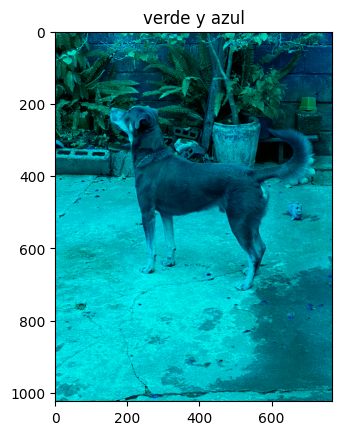

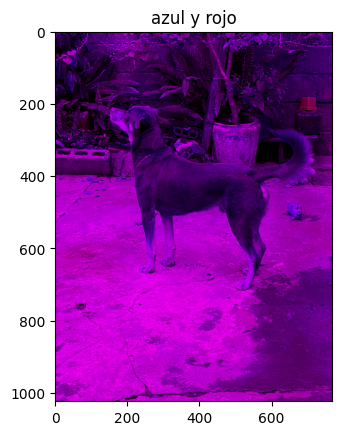

In [10]:
colorDict = {1:'azul',2:'verde',3:'rojo',10:'rojo y verde',20:'verde y azul',30:'azul y rojo'}

toby =  cv2.imread("toby.jpeg", cv2.COLOR_BGR2RGB)
for ind in colorDict:
    color_img = color_mapper(toby,ind)
    plt.title(colorDict[ind])
    plt.imshow(color_img)
    plt.show()




## Problema 2:

En el .zip del laboratorio se le compartió un conjunto de imágenes en escala de grises (imagen1, imagen2, perro) estas im ́agenes fueron creadas utilizando una escala de grises en 3D, cree una función que dadas las 3 imágenes se construya la imagen original a color.

In [17]:
def gray_to_color(image_red, image_green, image_blue, output_name):
   
    image_red = cv2.imread(image_red, cv2.IMREAD_GRAYSCALE)
    image_green= cv2.imread(image_green, cv2.IMREAD_GRAYSCALE)
    image_blue = cv2.imread(image_blue, cv2.IMREAD_GRAYSCALE)
    

    color_image = cv2.merge((image_red, image_green, image_blue))

    cv2.imwrite(output_name, color_image)
    
    return color_image

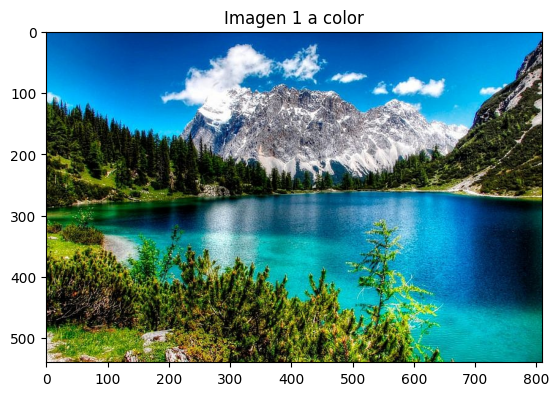

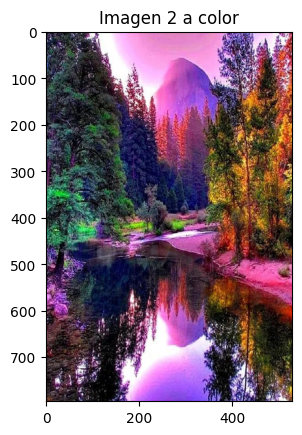

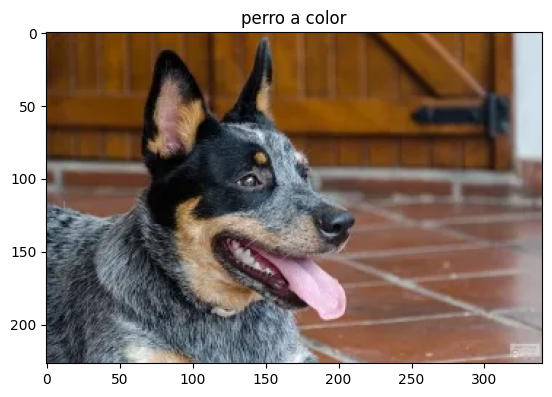

In [21]:
imagen1 = gray_to_color('imagen1/imagen1_salida_gray_rojo.jpg', 'imagen1/imagen1_salida_gray_verde.jpg','imagen1/imagen1_salida_gray_azul.jpg', 'imagen1.jpg')
plt.title('Imagen 1 a color')
plt.imshow(imagen1)
plt.show()

imagen2 = gray_to_color('imagen2/imagen2_salida_gray_rojo.jpg', 'imagen2/imagen2_salida_gray_verde.jpg','imagen2/imagen2_salida_gray_azul.jpg', 'imagen2.jpg')
plt.title('Imagen 2 a color')
plt.imshow(imagen2)
plt.show()

perro = gray_to_color('perro/perro_salida_gray_rojo.jpg', 'perro/perro_salida_gray_verde.jpg','perro/perro_salida_gray_azul.jpg', 'perro.jpg')
plt.title('perro a color')
plt.imshow(perro)
plt.show()

## Problema 3:
Cree una función que dada una imagen cree una escala de grises en tres dimensiones, tome en cuenta que su función debe crear 3 ima ́genes como salida. Para entregar este ejercicio debe incluir una las im ́agenes que haya utilizado como prueba y el resultado de las misma, no puede utilizar la imagen del Problema #2.


In [43]:
def gray_3d(imagepath, prefix):

    input_image = cv2.imread(imagepath)
    input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

    red_channel, green_channel, blue_channel = cv2.split(input_image_rgb)

    gray_red = np.stack([red_channel,red_channel,red_channel],axis=-1)
    gray_green = np.stack([green_channel, green_channel, green_channel], axis=-1)
    gray_blue = np.stack([blue_channel,blue_channel,blue_channel], axis=-1)

    cv2.imwrite(f"{prefix}_gray_red.jpg", gray_red)
    cv2.imwrite(f"{prefix}_gray_green.jpg", gray_green)
    cv2.imwrite(f"{prefix}_gray_blue.jpg", gray_blue)

    return gray_red, gray_green, gray_blue



(np.float64(-0.5), np.float64(767.5), np.float64(1023.5), np.float64(-0.5))

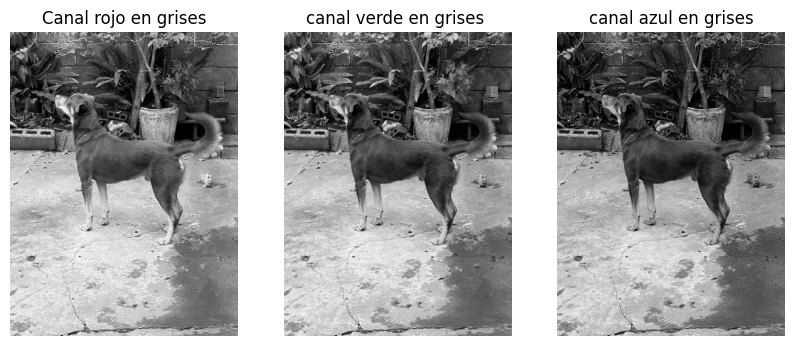

In [44]:
testing = gray_3d('toby.jpeg', 'toby_gray/toby')

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(testing[0])
plt.title('Canal rojo en grises')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(testing[1])
plt.title('canal verde en grises ')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(testing[2])
plt.title('canal azul en grises')
plt.axis('off')

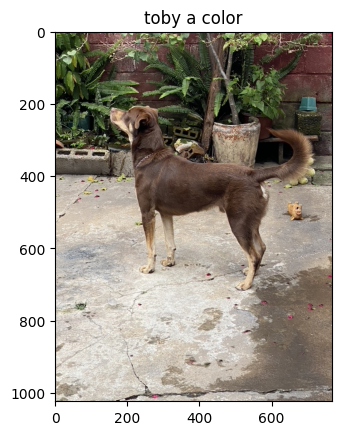

In [45]:
toby_inverso = gray_to_color('toby_gray/toby_gray_red.jpg', 'toby_gray/toby_gray_green.jpg','toby_gray/toby_gray_blue.jpg', 'toby_test.jpg')
plt.title('toby a color')
plt.imshow(toby_inverso)
plt.show()

## Problema 4:
Cree una función que dada una imagen, muestre el histograma de cada canal de color y el de escala de grises (utilice un promedio aritmético para su escala de grises, no puede usar funciones de opencv), sus histogramas deben incluir una línea vertical la cual muestre el valor de la media de la distribución.

In [67]:
def color_histograms(image_path):

    input_image = cv2.imread(image_path)
    input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

    red_channel, green_channel, blue_channel = cv2.split(input_image_rgb)

    gris_aritmetico = np.zeros_like(input_image_rgb)

    for i in range(0,input_image_rgb.shape[0]):
        for j in range(0, input_image_rgb.shape[1]):

            pixel = input_image_rgb[i,j]

            blue = pixel[2]
            green = pixel[1]
            red = pixel[0]

            gris_aritmetico[i,j] = pixel.mean()

    
    plt.figure(figsize= (20,10))
    
    plt.subplot(2, 2, 1)
    histogram(red_channel, 'red', 'Histogram del canal Rojo')
    
    plt.subplot(2, 2, 2)
    histogram(green_channel, 'green', 'Histogram del canal verde')
    
    plt.subplot(2, 2, 3)
    histogram(blue_channel, 'blue', 'Histogram del canal Azul')
    
    plt.subplot(2, 2, 4)
    histogram(gris_aritmetico, 'gray', 'Histogram de la escala de grises aritmetica')
    
    plt.tight_layout()
    plt.show()


def histogram(color_channel, histogram_color, title):

    plt.hist(color_channel.flatten(), bins=256, color=histogram_color)
    mean_val = np.mean(color_channel.flatten())
    plt.axvline(mean_val, color='k', linestyle='dashed', linewidth=1)
    plt.title(title)
    plt.xlim([0,255])
    plt.xlabel('intensidad del píxel')
    plt.ylabel('Frecuencia')
    plt.text(mean_val + 2, plt.ylim()[1] * 0.9, f'{mean_val:.2f}', color='k')





    

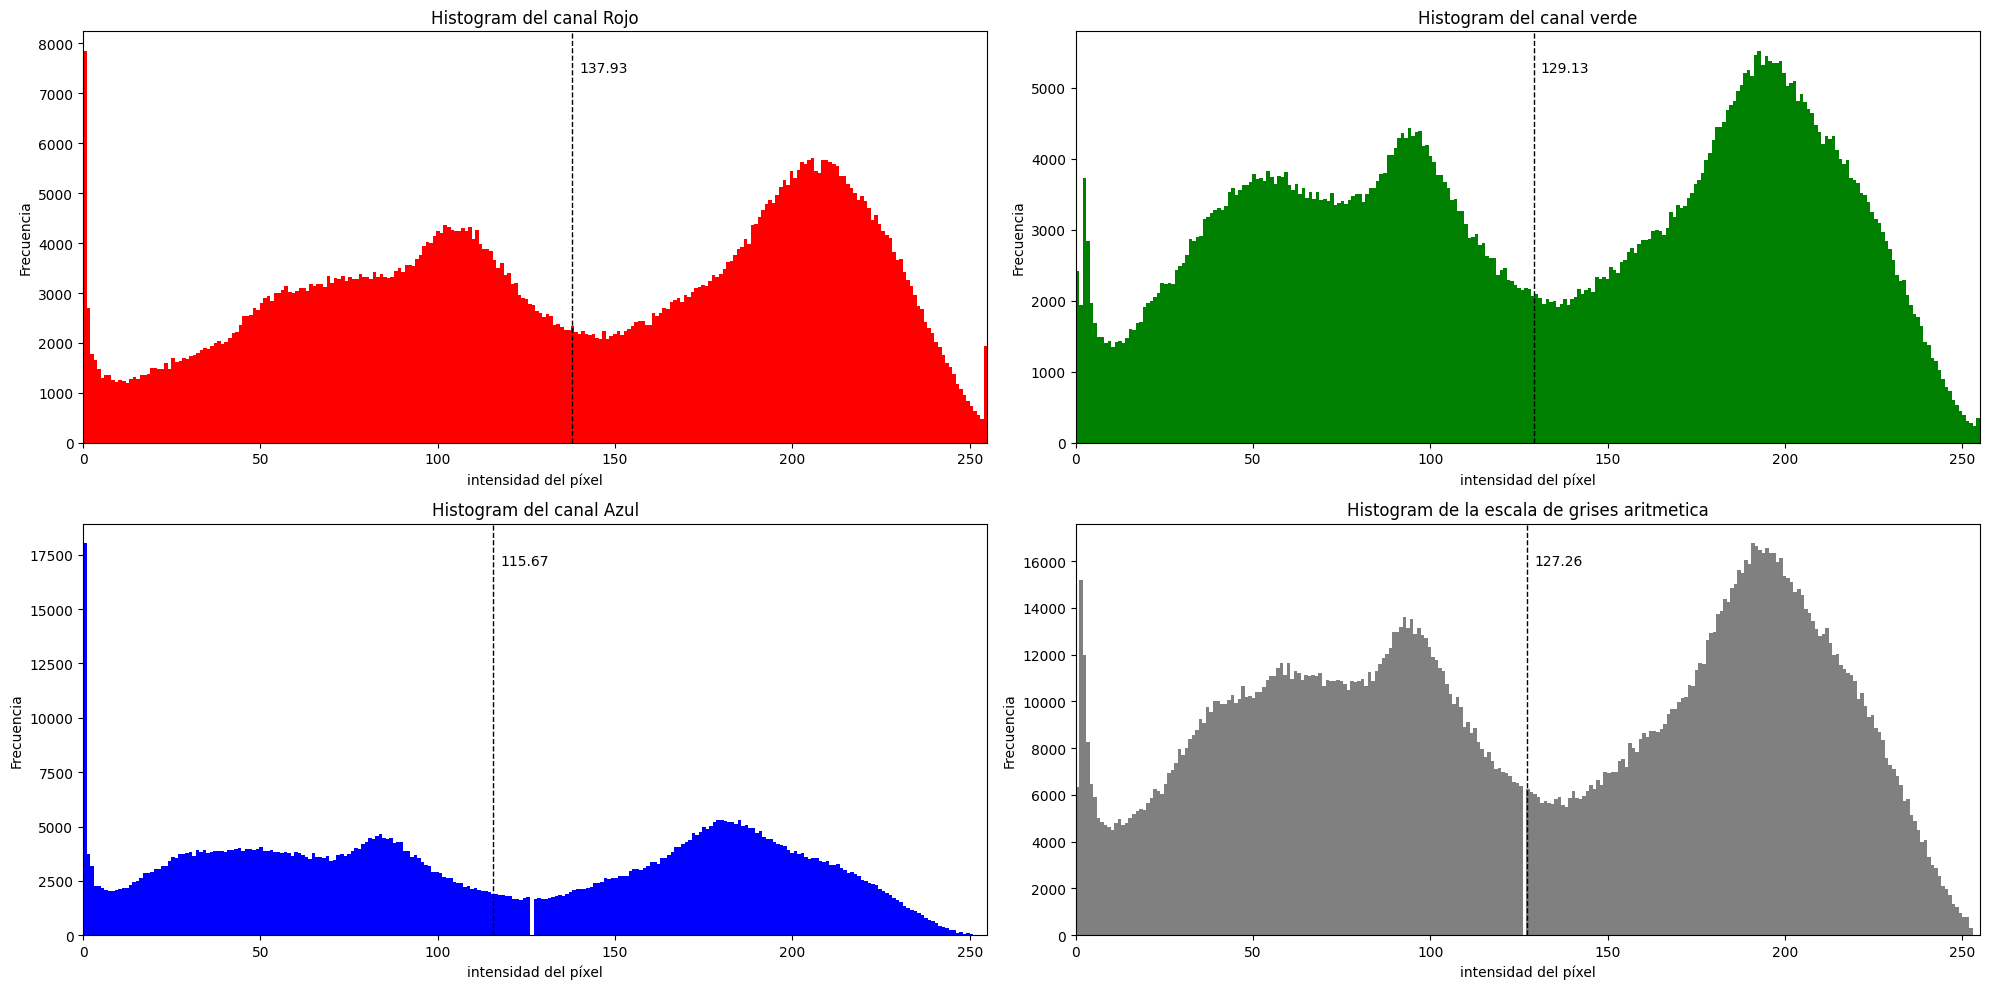

In [68]:
color_histograms('toby.jpeg')

## Problema 5:
Investigue en que consiste el enfoque de escala de grises ponderado, luego de esto implemente una función que dada una imagen, realice una escala de grises ponderada (notar que no existe una solución única).

Según (Khanal, S)La escala de grises ponderada se basa en multiplicar los valored de los canales RGB en cierto porcentaje o pesos determinando la fuerza o intencidad del color para su valor en la escala de grises. Un ejemplo puede ser:

````
 avg = (R * 0.299) + (G * 0.587) + (B * 0.114)
````
Significando que el verde tiene un peso del 60%, el rojo del 30% y el azul del 10% en el calculo de la escala de grises 

Estos pesos son comunmente utilizados, y provienen de un estandar de la industria de las comunicacciones CCIR 601. Esos pesos son medianamente consistentes con una característica de la visión humana; cuando vemos una escena bien iluminada, nuestros ojos con más sensibles a la luz verde-amarillenta. Adicional, estos pesos deberían producir un alto contraste en escenas con luz amarillenta y combras azuladas


Ref: 

- Khanal, S. (2020) Grayscale conversion, Medium. Available at: https://samirkhanal35.medium.com/grayscale-conversion-56189cd0e9ca (Accessed: 25 July 2024). 
- Howse, J., & Minichino, J. (2020). Learning OpenCV 4 Computer Vision with Python 3: Get to grips with tools, techniques, and algorithms for computer vision and machine learning. Packt Publishing Ltd.



In [71]:
def weighted_grayscale(imgpath):
    img = cv2.imread(imgpath)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    weighted_gray = np.zeros_like(img_rgb)
    for i in range(0,img_rgb.shape[0]):
        for j in range(0, img_rgb.shape[1]):

            pixel = img_rgb[i,j]

            blue = pixel[2]
            green = pixel[1]
            red = pixel[0]

            weighted_gray[i,j] = int((0.299*red)+ (0.587*green) + (0.114*blue))
    plt.imshow(weighted_gray)
    plt.title("Gris aritmetico")
    plt.show



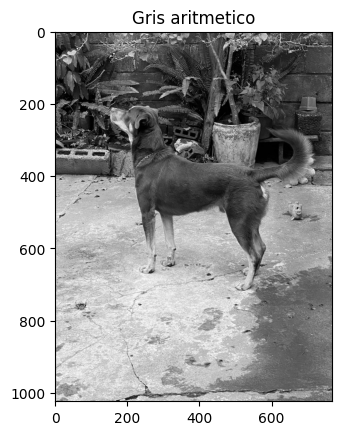

In [72]:
weighted_grayscale('toby.jpeg')

## Problema 6:

Investigue brevemente en que consiste el espacio de color HSV y como se mapean colores a dicho espacio, para entregar este ejercicio puede hacerlo por medio de Markdown en el mismo Notebook donde trabajó los demás ejercicios.

### **Espacio de Color HSV**

Según Capilla, P., Artigas, J. M., & Pujol, J. (2002) el sistema de color Tono, Saturación, Luminosidad (HUE, Sturation, Value, HSV) due desarrollado en 1978 por Alvey Ray Smith y esta inspirado en la forma en la que los artists describen y mezclan el color. El sólido de color correspondiente a este espacio es un cono hexagonal invertido, este puede apreciarse en la siguiente imagen:

<img src="conoHSV.png" alt="Cono HSV" width="400">

El eje de luminosidad varía desde el valor 0 (negro), que corresponde al vertice del hexágono. al valor 1 (blanco), el cual esta localizado en el centro del plano de color correpondiente a la base del hexágono con los tres colores primarios y los tres tonos secundarios localizados cada uno en uno de los vértices del hexágono. Análogamente a las paletas de los artistas cada color puede ser obtenido mezcalndo los colores primarios y oscureciendo por adición de negro. Por ejemplo un verde oliva, tendrá el tono hacia el lado amarillo del verde (ángulo de tono alrededor de uns 100°), una saturación (S) sobre 0.4 y una luminosidad (V) por ejemplo de 0.5. Los colores acromáticos ocupan el eje del solido correspondiento a saturación S=0 y con el tono H indefinido. 

A continuación una descripción más detallada de los 3 componentes de este modelo según color-ArcGIS Pro: 
 - Tono: Especifica el tono del color. Este se indica como un entreo de 0 al 240, ambos incluidos. Este se remuestrea a partir de los valores 0° a 360° en que se indica el tono como ángulo en sentido antiohorario alrededror del cono de color. Los colores primarios y secundarios presentan los siguientes valores de tono: rojo = 0 (0°), amarillo = 40 (60°), verde = 80 (120°), cian = 120 (180°), azul = 160 (240°) y magenta = 201 (300°).

 - Saturación: Especifica la intensidad de saturación estableida para cada color. La saturacicón se indica como un entero de 0 al 255, ambos incluidos (que representan de 0 al 100%). La stauración de un color hace referencia a la medida en que se aleja de un color neutro. Cuando la saturación es de 255, el color presenta una saturación máxima. Cuando el valor de la saturación es 0, el color es no saturado y parece gris

- Luminosidad: Especifica la intensidad del blanco en el color. El valor se indica como un entero de 0 al 255, ambos incluidos (que representan de 0 al 100%). Un color con un valor establecido en 0 aparece negro. Un color con un valor establecido en 255 y una saturación de 0 aparece como blanco.

ref:
- Capilla, P., Artigas, J. M., & Pujol, J. (2002). Fundamentos de colorimetría (Vol. 55). Universitat de València.
- Función Conversión de Modelo de Color (no date) Función Conversión de modelo de color-ArcGIS Pro | Documentación. Available at: https://pro.arcgis.com/es/pro-app/latest/help/analysis/raster-functions/color-model-conversion-function.htm#:~:text=El%20modelo%20de%20color%20HSV,admite%20entradas%20de%203%20bandas. (Accessed: 25 July 2024). 

